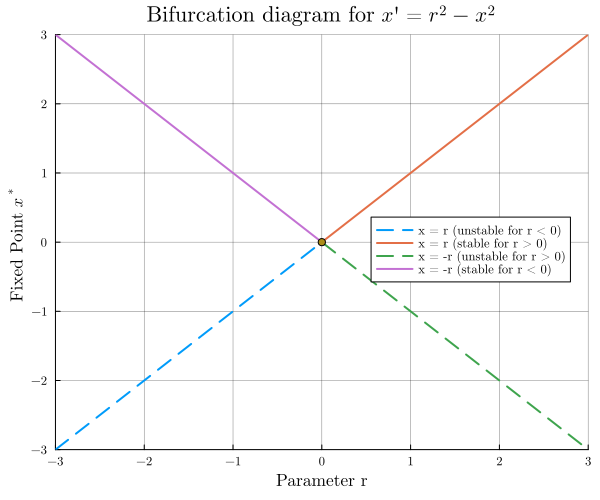

In [63]:
using Plots, LaTeXStrings

# Parameter range
r = range(-3, 3, length=400)

# Branches: x* = ±r
x_plus  = collect(r)
x_minus = -x_plus

# Masks for stability
mask_pos = r .>= 0
mask_neg = r .<= 0

# Masked series
xp_pos = ifelse.(mask_pos, x_plus,  missing)  # x = r, stable for r≥0
xp_neg = ifelse.(mask_neg, x_plus,  missing)  # x = r, unstable for r≤0
xm_pos = ifelse.(mask_pos, x_minus, missing)  # x = -r, unstable for r≥0
xm_neg = ifelse.(mask_neg, x_minus, missing)  # x = -r, stable for r≤0

p = plot(
    size=(600, 500),
    fontfamily="Computer Modern",
    xlabel="Parameter r",
    ylabel="Fixed Point "* L"x^*",
    title="Bifurcation diagram for "*L"x' = r^2 - x^2",
    xlim=(-3, 3),
    ylim=(-3, 3),
    legend=:right,
    grid=true,
    gridalpha=0.5,
)

plot!(r, xp_neg,  linestyle=:dash,  label="x = r (unstable for r < 0)", lw=2)
plot!(r, xp_pos,  linestyle=:solid, label="x = r (stable for r > 0)", lw=2)
plot!(r, xm_pos,  linestyle=:dash,  label="x = -r (unstable for r > 0)", lw=2)
plot!(r, xm_neg,  linestyle=:solid, label="x = -r (stable for r < 0)", lw=2)

scatter!([0.0], [0.0], ms=4, label="")  # critical point

display(p)


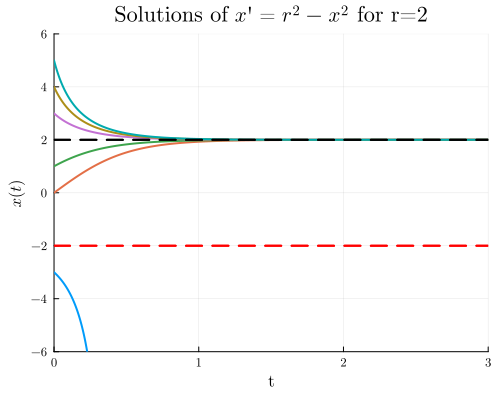

┌ Warning: At t=0.40235947947517264, dt was forced below floating point epsilon 5.551115123125783e-17, and step error estimate = 1.3511113655390128. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [109]:
using DifferentialEquations

# Define the ODE function
function ode!(du, u, p, t)
    r = p[1]
    du[1] = r^2 - u[1]^2
end

# Initial conditions and time span
u0 = [-3.0, 0.0, 1.0, 3.0, 4.0, 5.0]  # Starting point
tspan = (0.0, 3.0)
p = [2.0]  # Parameter r

# Solve ODE for different initial conditions
sol = []
for u0i in u0
    prob = ODEProblem(ode!, [u0i], tspan, p)
    push!(sol, solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8))
end 

# Plot the solutions
p2 = plot(size=(500, 400), xlabel="Time", ylabel=L"x(t)", 
          title="Solutions of "*L"x' = r^2 - x^2"*" for r=2", 
          legend=false, fontfamily="Computer Modern",
          ylims=(-6, 6))
for (i,s) in enumerate(sol)
    plot!(p2, s, label=L"x_0= "*string(u0[i]), lw=2)
end

hline!([0, 3], [2, 2], linestyle=:dash, color=:black, label="x = r (stable)", lw=2)
hline!([0, -3], [-2, -2], linestyle=:dash, color=:red, label="x = -r (unstable)", lw=2)
display(p2)

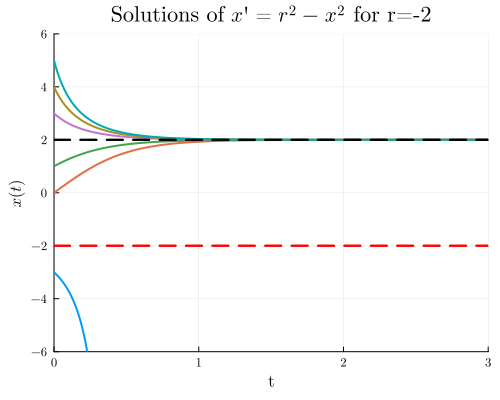

┌ Warning: At t=0.40235947947517264, dt was forced below floating point epsilon 5.551115123125783e-17, and step error estimate = 1.3511113655390128. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [110]:
# Solve ODE for different initial conditions
sol2 = []
for u0i in u0
    prob = ODEProblem(ode!, [u0i], tspan, [-2.0])
    push!(sol2, solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8))
end 

# Plot the solutions
plot2 = plot(size=(500, 400), xlabel="Time", ylabel=L"x(t)", 
             title="Solutions of "*L"x' = r^2 - x^2"*" for r=-2", 
             legend=false, fontfamily="Computer Modern",
             ylims=(-6, 6))
for (i,s) in enumerate(sol2)
    plot!(plot2, s, label=L"x_0= "*string(u0[i]), lw=2)
end

hline!([0, 3], [2, 2], linestyle=:dash, color=:black, label="x = r (stable)", lw=2)
hline!([0, -3], [-2, -2], linestyle=:dash, color=:red, label="x = -r (unstable)", lw=2)
display(plot2)

┌ Warning: At t=0.0915510243864793, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.011585897470253. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.11552453047696705, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.1555174375660158. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.16215917954665918, dt was forced below floating point epsilon 2.7755575615628914e-17, and step error estimate = 1.2477589353411702. Aborting. There is either an

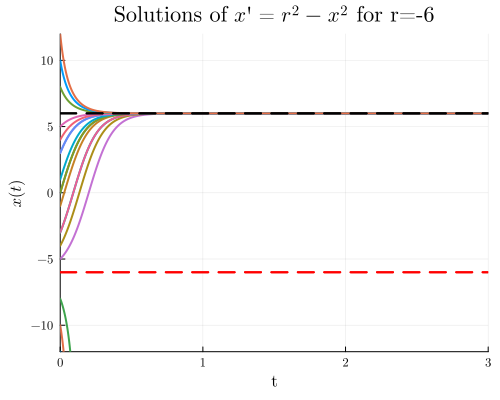

In [111]:
# Solve ODE for different initial conditions
sol3 = []
u0_cat = sort(cat(u0, [8.0, 10.0, 12.0], dims=1))  
u02 = sort(cat(u0_cat, [-i for i in u0_cat], dims=1))  
for u0i in u02
    prob = ODEProblem(ode!, [u0i], tspan, [-6.0])
    push!(sol3, solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8))
end 

# Plot the solutions
plot3 = plot(size=(500, 400), xlabel="Time", ylabel=L"x(t)", 
             title="Solutions of "*L"x' = r^2 - x^2"*" for r=-6", 
             legend=false, fontfamily="Computer Modern",
             ylims=(-12, 12))
for (i,s) in enumerate(sol3)
    plot!(plot3, s, label=L"x_0= "*string(u02[i]), lw=2)
end

hline!([0, 6], [6, 6], linestyle=:dash, color=:black, label="x = r (stable)", lw=2)
hline!([0, -6], [-6, -6], linestyle=:dash, color=:red, label="x = -r (unstable)", lw=2)
display(plot3)

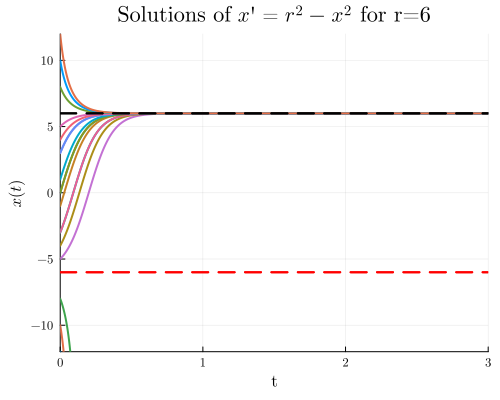

┌ Warning: At t=0.0915510243864793, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.011585897470253. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.11552453047696705, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.1555174375660158. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.16215917954665918, dt was forced below floating point epsilon 2.7755575615628914e-17, and step error estimate = 1.2477589353411702. Aborting. There is either an

In [112]:
# Solve ODE for different initial conditions
sol4 = []
for u0i in u02
    prob = ODEProblem(ode!, [u0i], tspan, [6.0])
    push!(sol4, solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8))
end 

# Plot the solutions
plot4 = plot(size=(500, 400), xlabel="Time", ylabel=L"x(t)", 
             title="Solutions of "*L"x' = r^2 - x^2"*" for r=6", 
             legend=false, fontfamily="Computer Modern",
             ylims=(-12, 12))
for (i,s) in enumerate(sol4)
    plot!(plot4, s, label=L"x_0= "*string(u02[i]), lw=2)
end

hline!([0, 6], [6, 6], linestyle=:dash, color=:black, label="x = r (stable)", lw=2)
hline!([0, -6], [-6, -6], linestyle=:dash, color=:red, label="x = -r (unstable)", lw=2)
display(plot4)